In [ ]:
!pip install pybullet

In [48]:
import pybullet as p
import pybullet_data
import time

# Connect to PyBullet using the GUI mode (for local use)
p.connect(p.GUI)  # Use p.DIRECT for non-graphical mode (for Google Colab)

# Set the path for default pybullet data
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Load the humanoid model from the URDF file
robot_id = p.loadURDF("humanoid/humanoid.urdf", useFixedBase=True)

# Get the number of joints in the humanoid robot
num_joints = p.getNumJoints(robot_id)
print(f"Number of joints in the humanoid robot: {num_joints}")

Number of joints in the humanoid robot: 15


In [49]:
# Store joint angles data for later plotting
joint_angles = []

# Run the simulation for 1000 steps
for i in range(1000):
    p.stepSimulation()  # Perform one step of simulation

    # Collect joint angles for each joint
    joint_angles_step = []
    for joint_index in range(num_joints):
        joint_info = p.getJointState(robot_id, joint_index)
        joint_angles_step.append(joint_info[0])  # Joint position (angle)
    joint_angles.append(joint_angles_step)

    time.sleep(0.01)  # Adding a small delay to simulate real-time motion

# Disconnect from PyBullet after simulation ends
p.disconnect()

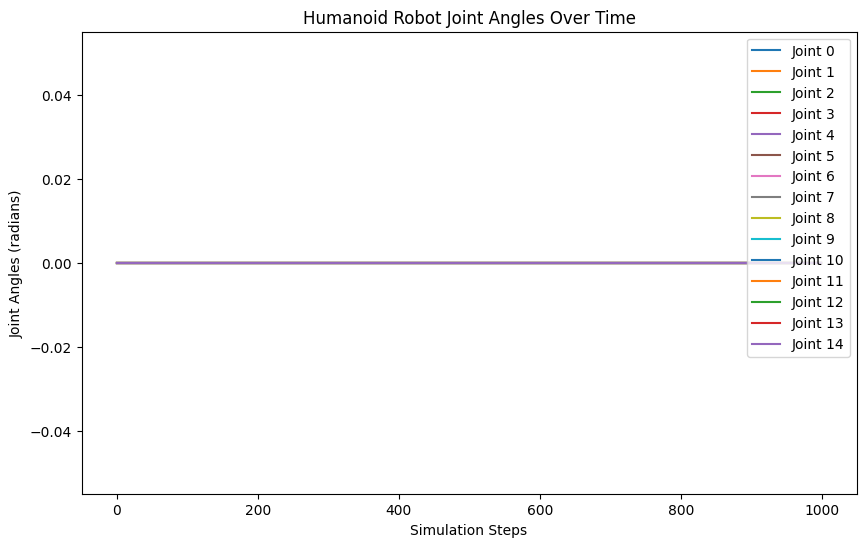

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the joint angles data into a numpy array for easier handling
joint_angles = np.array(joint_angles)

# Plot the joint angles for each joint
plt.figure(figsize=(10, 6))
for i in range(num_joints):
    plt.plot(joint_angles[:, i], label=f"Joint {i}")

plt.xlabel("Simulation Steps")
plt.ylabel("Joint Angles (radians)")
plt.title("Humanoid Robot Joint Angles Over Time")
plt.legend()
plt.show()

In [51]:
import csv

# Export joint angles data to a CSV file
with open('joint_angles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Step"] + [f"Joint {i}" for i in range(num_joints)])  # Writing headers

    for step, angles in enumerate(joint_angles):
        writer.writerow([step] + list(angles))

print("Data exported to 'joint_angles.csv'")

Data exported to 'joint_angles.csv'
